***
# Wind Turbine Linear Regression.
***

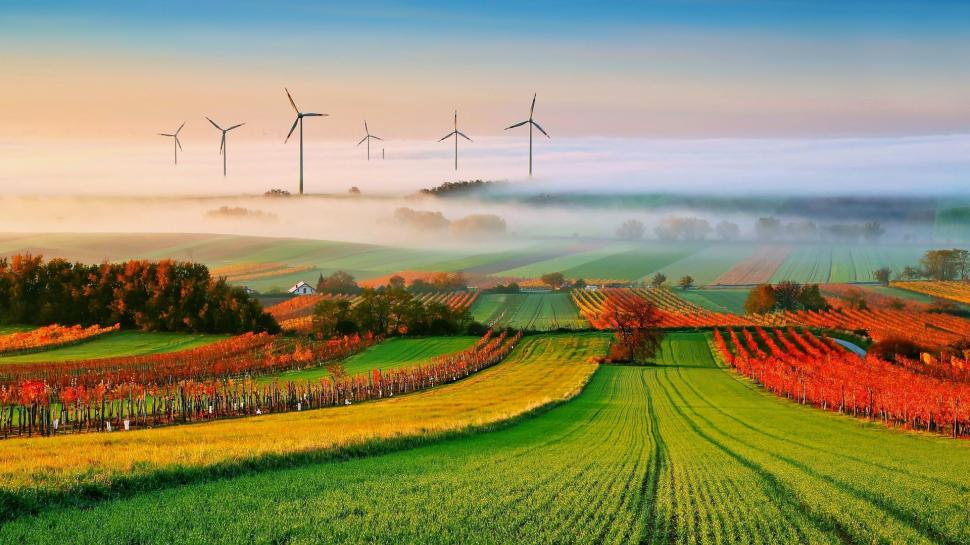

***
### Aim:
***

An investigation into various forms of linear regression applied to power curves of wind turbines in the hope of achieving the best possible fit to the data given.

***
##### Imports & Preferences:

In [2]:
# Numerical array and fitting lines:
import numpy as np

#Plots:
import matplotlib.pyplot as plt

# Dealing with Dataframes:
import pandas as pd

import seaborn as sns

In [3]:
# Nicer plot style:
plt.style.use('ggplot')

# Bigger plots:
plt.rcParams['figure.figsize'] = (18,10)

***
#### Data:

In [4]:
# Import data
data = 'https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv'

raw_data = pd.read_csv(data)
raw_data

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


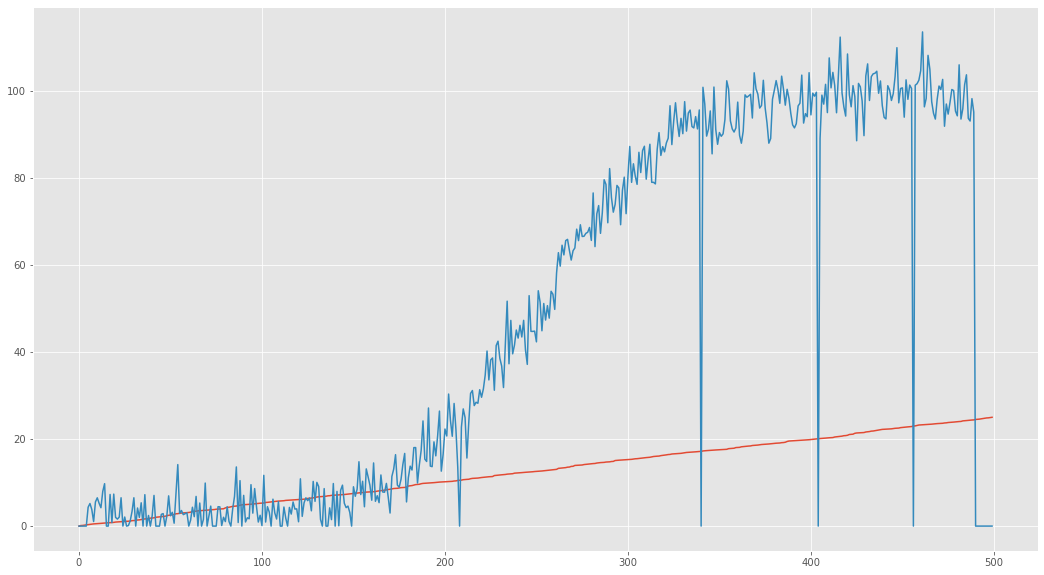

In [5]:
# Visualise Data:
plt.plot(raw_data)

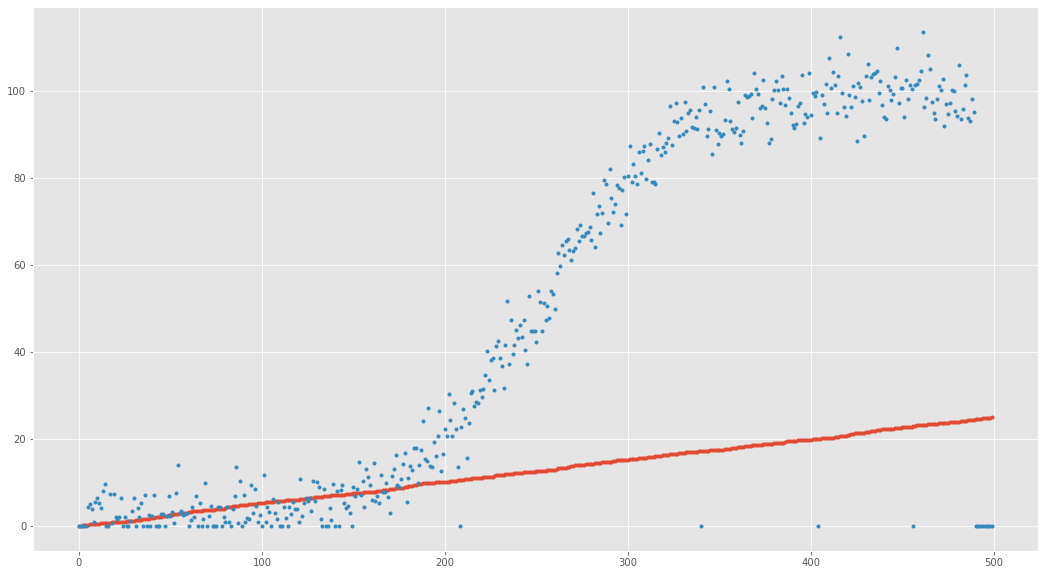

In [12]:
# Use dots instead:
plt.plot(raw_data, '.')